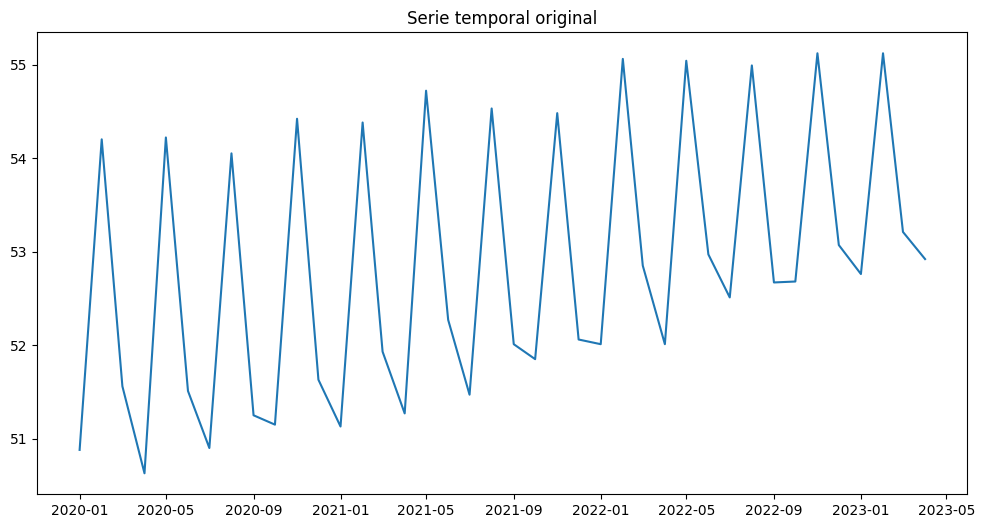

Frecuencia detectada: MS
Periodo visual estimado: 12


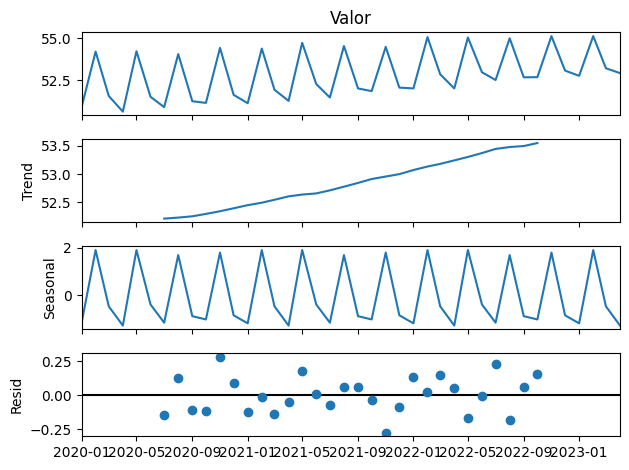

Varianza residuos (Aditivo): 0.01790545841600522


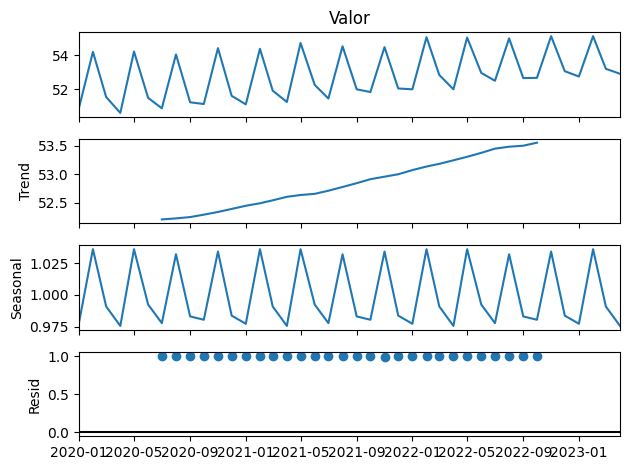

Varianza residuos (Multiplicativo): 7.061211343272418e-06


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# =========================
# Carga de datos
# =========================
df = pd.read_csv("Tarea Tema 2 - Descomposicion y Periodo.csv")

# Convertir fecha
df["Fecha"] = pd.to_datetime(df["Fecha"])
df = df.set_index("Fecha").sort_index()

serie = df.iloc[:, 0].astype(float)

# =========================
# Visualización
# =========================
plt.figure(figsize=(12,6))
plt.plot(serie)
plt.title("Serie temporal original")
plt.show()

# =========================
# Determinar frecuencia
# =========================
freq = pd.infer_freq(serie.index)
print("Frecuencia detectada:", freq)

# =========================
# Periodo visual estimado
# =========================
# Si es mensual -> 12
# Si es semanal -> 52
# Si es diario -> 7 o 365 dependiendo patrón
# Ajusta si al graficar observas otro patrón

periodo_visual = 12  # Cambiar si tu gráfico sugiere otro
print("Periodo visual estimado:", periodo_visual)

# =========================
# Descomposición aditiva
# =========================
descomp_add = seasonal_decompose(serie, model="additive", period=periodo_visual)

descomp_add.plot()
plt.show()

var_residuos_add = np.var(descomp_add.resid.dropna())
print("Varianza residuos (Aditivo):", var_residuos_add)

# =========================
# Descomposición multiplicativa
# =========================
descomp_mul = seasonal_decompose(serie, model="multiplicative", period=periodo_visual)

descomp_mul.plot()
plt.show()

var_residuos_mul = np.var(descomp_mul.resid.dropna())
print("Varianza residuos (Multiplicativo):", var_residuos_mul)

In [2]:
from statsmodels.tsa.stattools import acf

# Periodo determinado mediante ACF
acf_vals = acf(serie.dropna(), nlags=24)
periodo_acf = max(range(2, 25), key=lambda k: acf_vals[k])

print("Periodo determinado (ACF):", periodo_acf)

# Descomposición con periodo determinado
descomp_add_acf = seasonal_decompose(serie, model="additive", period=periodo_acf)
descomp_mul_acf = seasonal_decompose(serie, model="multiplicative", period=periodo_acf)

var_res_add_acf = np.var(descomp_add_acf.resid.dropna())
var_res_mul_acf = np.var(descomp_mul_acf.resid.dropna())

print("Varianza residuos (Aditivo - periodo ACF):", var_res_add_acf)
print("Varianza residuos (Multiplicativo - periodo ACF):", var_res_mul_acf)

Periodo determinado (ACF): 3
Varianza residuos (Aditivo - periodo ACF): 0.03353450104963245
Varianza residuos (Multiplicativo - periodo ACF): 1.3269705273778695e-05
